In [1]:
import jax.numpy as jnp
from jax import random
from jax.config import config
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

config.update("jax_enable_x64", True)
plt.rcParams["figure.figsize"] = 6, 6

In [3]:
key = random.PRNGKey(12)

In [4]:
key, subkey = random.split(key)

# Number of 'batches'
B = 10000

# Number of images
N = 1000000

# Number of epochs
n_epoch = 5

# Averaging weight
beta = 0.999

# Regularization parameter
alpha = 0.01

# Update at the 'good' image
hx = 1

# Correct value
h_sol = 1 / N + alpha

# Starting value
# h0 = jnp.abs(random.normal(subkey))
h0 = h_sol

### Exponential average

In [5]:
h_sol

0.010001

In [6]:
h = h0
h_all = [h]

for i in tqdm(range(n_epoch)):
    key, subkey = random.split(key)
    p = random.permutation(subkey, B)

    for i in range(B):
        if p[i] == 0:
            hi = hx * B / N + alpha
        else:
            hi = alpha

        h = beta * h + (1 - beta) * hi

        h_all.append(h)

h_all = jnp.array(h_all)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.16it/s]


gt = 0.010001
sol = 0.010000087704459903
alpha = 0.01


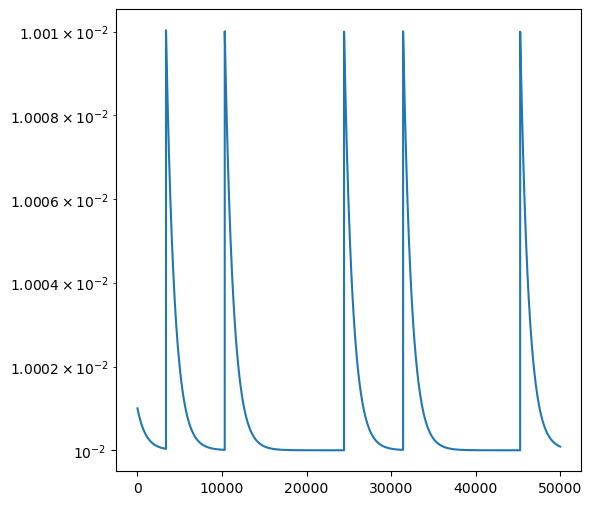

In [7]:
plt.semilogy(h_all)

print(f"gt = {h_sol}")
print(f"sol = {h_all[-1]}")
print(f"alpha = {alpha}")

In [8]:
jnp.max(h_all[2000:10000])

Array(0.01001003, dtype=float64)

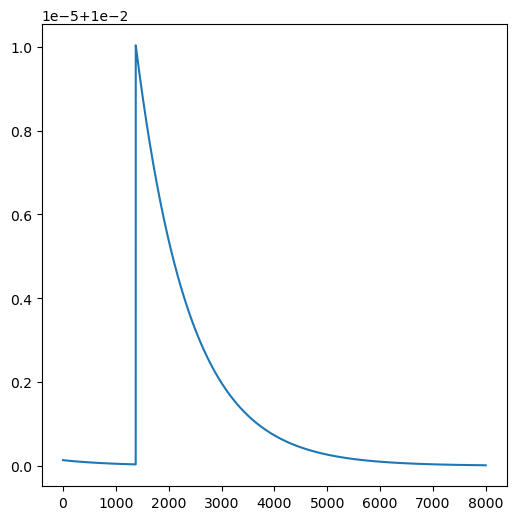

In [9]:
plt.plot(h_all[2000:10000])

### Arithmetic mean

In [10]:
h = h0
h_all = [h]

h_terms = [h]
n = 1
for i in tqdm(range(n_epoch)):
    key, subkey = random.split(key)
    p = random.permutation(subkey, B)

    for i in range(B):
        if p[i] == 0:
            hi = hx * B / N + alpha
        else:
            hi = alpha

        h_terms.append(hi)
        n += 1
        h = sum(h_terms) / n

        h_all.append(h)

h_all = jnp.array(h_all)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.88s/it]


gt = 0.010001
sol = 0.010000999999993805


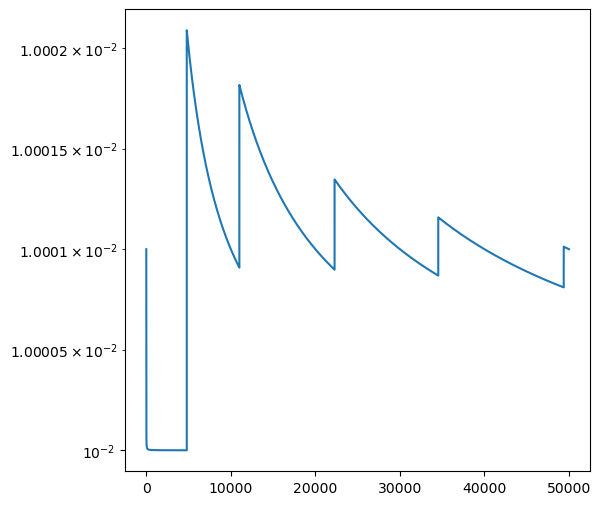

In [11]:
plt.semilogy(h_all)

print(f"gt = {h_sol}")
print(f"sol = {h_all[-1]}")
# print(f"alpha*B/N = {alpha*B/N}")
# print(f"(hx+alpha)*B/N = {(hx+alpha)*B/N}")

### Arithmetic mean with memory 

In [12]:
beta = 0.99

h = 100
h_all = [h]

h_terms = []
n = 0
for i in tqdm(range(n_epoch)):
    key, subkey = random.split(key)
    p = random.permutation(subkey, B)

    for i in range(B):
        if p[i] == 0:
            hi = hx * B / N + alpha
        else:
            hi = alpha

        h_terms.append(hi)
        n += 1
        h_new = sum(h_terms) / n

        h = beta * h + (1 - beta) * h_new

        h_all.append(h)

h_all = jnp.array(h_all)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.88s/it]


gt = 0.010001
sol = 0.010001001987921596


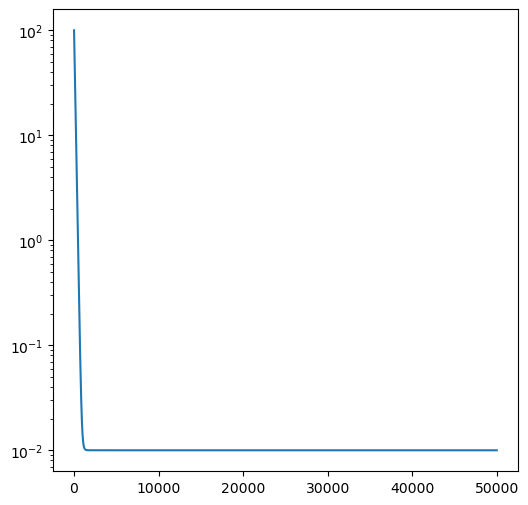

In [13]:
plt.semilogy(h_all)

print(f"gt = {h_sol}")
print(f"sol = {h_all[-1]}")
# print(f"alpha*B/N = {alpha*B/N}")
# print(f"(hx+alpha)*B/N = {(hx+alpha)*B/N}")